Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape


        y_ = np.where(y <= 0, -1, 1)

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(self.w, x_i) - self.b) >= 1

                if condition:
                    # Only regularization term
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Regularization + hinge loss gradient
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - y_[idx] * x_i
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


In [9]:
# Generate linearly separable data
np.random.seed(0)

X_pos = np.random.randn(50, 2) + [2, 2]
X_neg = np.random.randn(50, 2) + [-2, -2]

X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(50), -np.ones(50)))


In [10]:
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)


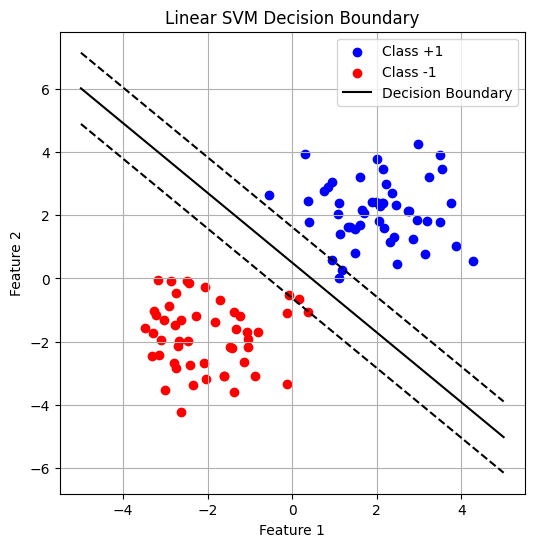

In [12]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(6, 6))

    # Scatter points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

    # Decision boundary
    x1 = np.linspace(-5, 5, 100)
    x2 = -(model.w[0] * x1 - model.b) / model.w[1]

    # Margin lines
    x2_margin1 = -(model.w[0] * x1 - model.b + 1) / model.w[1]
    x2_margin2 = -(model.w[0] * x1 - model.b - 1) / model.w[1]

    plt.plot(x1, x2, 'k-', label='Decision Boundary')
    plt.plot(x1, x2_margin1, 'k--')
    plt.plot(x1, x2_margin2, 'k--')

    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Linear SVM Decision Boundary")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, svm)
